# Analyse qualitative bivariée : Exemples des manuels

Version du 18 avril 2024





## Importer les librairies nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

## Références bibliographiques

Référence:

* [Statistique descriptive bidimensionnelle](http://wikistat.fr/pdf/st-l-des-bi.pdf) (Site Wikistat)


Compléments:

* Hamon : Hamon Philippe, Hamon Agnès, et Jégou Nicolas, _Statistique descriptive. Cours et exercices corrigés_, Rennes, PUR, 2008.
* Bennani: Bennani Dosse Mohammed, _Statistique bivariée avec R_, Rennes, PUR, 2011.
* Saly : Saly Pierre, _Méthodes statistiques descriptives pour les historiens_, Paris, A. Colin, 1991.
* [Statology - Tutorials](https://www.statology.org/tutorials/)



## Explorer les observations

* Regrouper et inspecter : la distribution
* Afficher et analyser : les graphiques

# Deux variables qualitatives



Documentation:
* Hamon (cit.), Chapitre 4, 99-111.
* Bennani (cit.), Chapitre 2, 23-35.


## Produits et régions de vente

### Tableau de contingence

In [24]:
d = {'Ouest':[28,14, 45,33,12], 'Sud':[36,21,25,64,23], 
     'Est':[21, 64, 38, 11, 7], 'Nord':[79,42,67,9,41]}
ddf = pd.DataFrame(d)
ddf = ddf.transpose()
ddf.columns= ['P1', 'P2', 'P3', 'P4', 'P5']
ddf

,P1,P2,P3,P4,P5
Ouest,28,14,45,33,12
Sud,36,21,25,64,23
Est,21,64,38,11,7
Nord,79,42,67,9,41


In [25]:
## Ajouter une ligne avec totaux des colonnes
ddf.loc['Total']= ddf.sum()
## Ajouter une colonnne avec totaux des lignes
ddf['Total'] = ddf.sum(axis=1)
ddf

,P1,P2,P3,P4,P5,Total
Ouest,28,14,45,33,12,132
Sud,36,21,25,64,23,169
Est,21,64,38,11,7,141
Nord,79,42,67,9,41,238
Total,164,141,175,117,83,680


In [26]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

ddf_frq = np.round(ddf*100/ddf.iloc[-1,-1],1)
ddf_frq

,P1,P2,P3,P4,P5,Total
Ouest,4.1,2.1,6.6,4.9,1.8,19.4
Sud,5.3,3.1,3.7,9.4,3.4,24.9
Est,3.1,9.4,5.6,1.6,1.0,20.7
Nord,11.6,6.2,9.9,1.3,6.0,35.0
Total,24.1,20.7,25.7,17.2,12.2,100.0


### Pourcentages des lignes

In [27]:
### pourcentages des lignes
stacked_data_lignes = ddf.apply(lambda x: (x/sum(x)*100*2).round(4), axis=1) # axis=0
stacked_data_lignes

,P1,P2,P3,P4,P5,Total
Ouest,21.2121,10.6061,34.0909,25.0000,9.0909,100.0
Sud,21.3018,12.4260,14.7929,37.8698,13.6095,100.0
Est,14.8936,45.3901,26.9504,7.8014,4.9645,100.0
Nord,33.1933,17.6471,28.1513,3.7815,17.2269,100.0
Total,24.1176,20.7353,25.7353,17.2059,12.2059,100.0


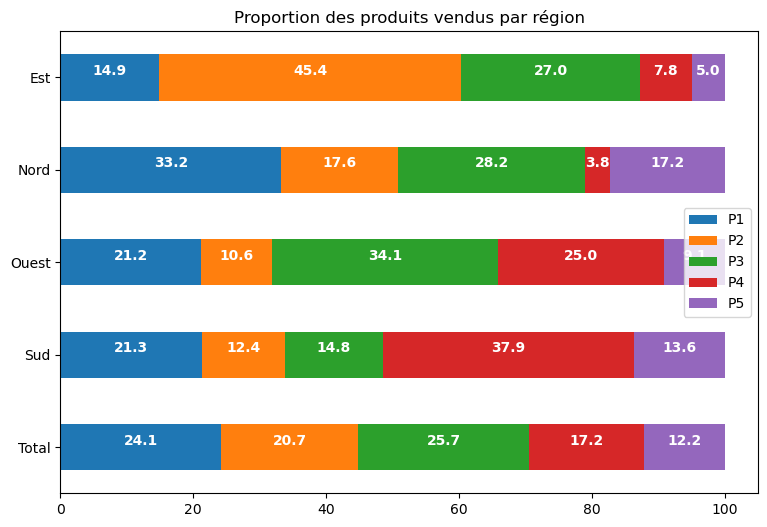

In [6]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

ax = stacked_data_lignes.iloc[:, :-1].sort_index(ascending=False).plot(kind="barh", 
                    stacked=True, figsize=(9,6), title='Proportion des produits vendus par région')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in ax.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    ax.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    



### Pourcentages des colonnes

In [7]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data_cols = ddf.apply(lambda x: round(x*100/sum(x)*2, 2), axis=0) 
stacked_data_cols

,P1,P2,P3,P4,P5,Total
Ouest,17.07,9.93,25.71,28.21,14.46,19.41
Sud,21.95,14.89,14.29,54.70,27.71,24.85
Est,12.80,45.39,21.71,9.40,8.43,20.74
Nord,48.17,29.79,38.29,7.69,49.40,35.00
Total,100.00,100.00,100.00,100.00,100.00,100.00


In [8]:
### Interchanger les lignes avec les colonnes (=transposer) 
#  afin d'utiliser le même affichage en diagramme à barres
ts_stacked_data_cols = stacked_data_cols.transpose()
ts_stacked_data_cols

,Ouest,Sud,Est,Nord,Total
P1,17.07,21.95,12.80,48.17,100.0
P2,9.93,14.89,45.39,29.79,100.0
P3,25.71,14.29,21.71,38.29,100.0
P4,28.21,54.70,9.40,7.69,100.0
P5,14.46,27.71,8.43,49.40,100.0
Total,19.41,24.85,20.74,35.00,100.0


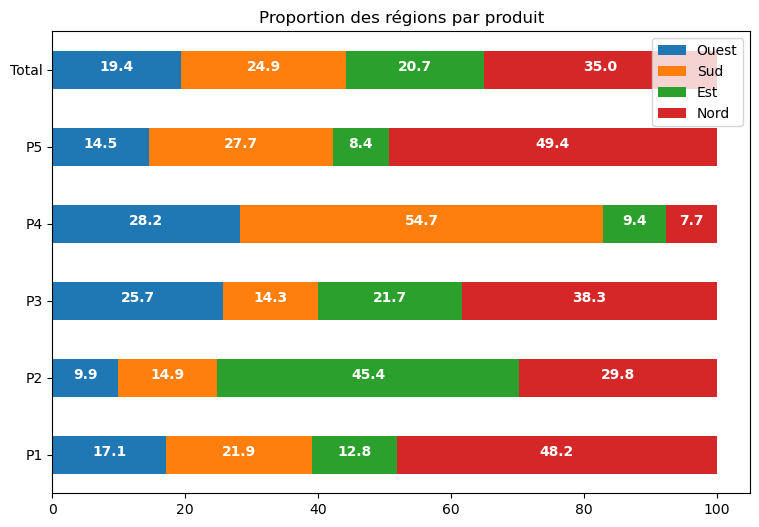

In [9]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = ts_stacked_data_cols.iloc[:, :-1].plot(kind="barh", 
                        stacked=True, figsize=(9,6), title='Proportion des régions par produit')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Tableau théorique en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [10]:
tx = ddf.loc[:,["Total"]]
ty = ddf.loc[["Total"],:]
### Total général, dernière cellule de la dernière ligne
n = ddf.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Non arrondi
print(indep)

print('\n--------------------------\n')
# Arrondi
print(indep.round(0).astype(int))



               P1          P2          P3          P4         P5  Total
Ouest   31.835294   27.370588   33.970588   22.711765  16.111765  132.0
Sud     40.758824   35.042647   43.492647   29.077941  20.627941  169.0
Est     34.005882   29.236765   36.286765   24.260294  17.210294  141.0
Nord    57.400000   49.350000   61.250000   40.950000  29.050000  238.0
Total  164.000000  141.000000  175.000000  117.000000  83.000000  680.0

--------------------------

        P1   P2   P3   P4  P5  Total
Ouest   32   27   34   23  16    132
Sud     41   35   43   29  21    169
Est     34   29   36   24  17    141
Nord    57   49   61   41  29    238
Total  164  141  175  117  83    680


In [11]:
### Écart à l'indépendance:
# différence en effectifs entre le théorique et l'observé
#  Valeurs arrondies
### Doc. :
#   Bennani, p.30
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (ddf-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.round(0).astype(int))


       P1  P2  P3  P4  P5
Ouest  -4 -13  11  10  -4
Sud    -5 -14 -18  35   2
Est   -13  35   2 -13 -10
Nord   22  -7   6 -32  12


In [12]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((ddf-indep)/np.sqrt(indep),2)).iloc[:-1,:-1]
residus_ponderes


,P1,P2,P3,P4,P5
Ouest,-0.68,-2.56,1.89,2.16,-1.02
Sud,-0.75,-2.37,-2.80,6.48,0.52
Est,-2.23,6.43,0.28,-2.69,-2.46
Nord,2.85,-1.05,0.73,-4.99,2.22


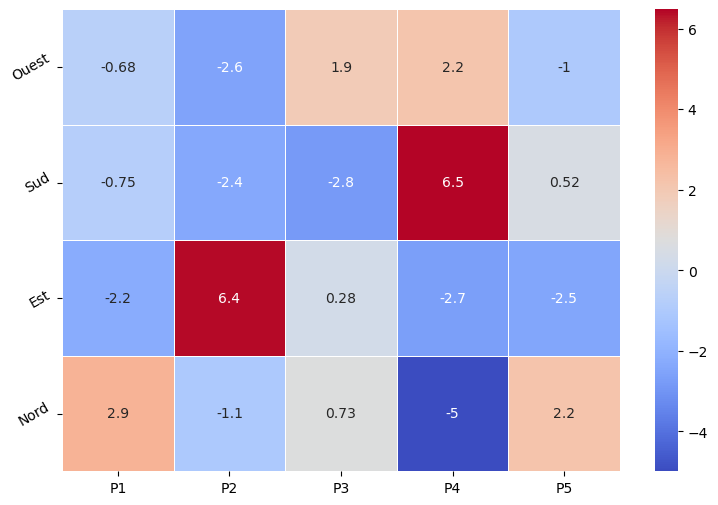

In [13]:
### Résidus pondérés
tableau = residus_ponderes

fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

### Calcul du chi carré ou chi2

In [14]:
### Degrés d'indépendance
print('di/dof :', (len(residus_ponderes)-1) * (len(residus_ponderes.columns)-1), '=', len(residus_ponderes)-1, '*', len(residus_ponderes.columns)-1)

di/dof : 12 = 3 * 4


In [35]:
### Ecarts positifs (parce qu'au carré), pondérés par les effectifs
### Doc. :
#   Bennani, p.31
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = round((ddf-indep)**2/indep,2).iloc[:-1,:-1]
ecarts_ponderes


,P1,P2,P3,P4,P5
Ouest,0.46,6.53,3.58,4.66,1.05
Sud,0.56,5.63,7.86,41.94,0.27
Est,4.97,41.33,0.08,7.25,6.06
Nord,8.13,1.09,0.54,24.93,4.92


In [16]:
### La somme de tout le tableau donne le chi carré ou chi2
colonnes = ecarts_ponderes.sum()
chi_2 = ecarts_ponderes.sum().sum()
print(round(chi_2, 2))

171.84


In [38]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(ddf.iloc[:-1,:-1])

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)

### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),1)
dfe.columns= ['P1', 'P2', 'P3', 'P4', 'P5']
dfe.index=ecarts_ponderes.index
dfe

Chi2 : 171.84495622957783 , dof : 12
p-value : 2.0017466576875573e-30


,P1,P2,P3,P4,P5
Ouest,31.8,27.4,34.0,22.7,16.1
Sud,40.8,35.0,43.5,29.1,20.6
Est,34.0,29.2,36.3,24.3,17.2
Nord,57.4,49.4,61.2,41.0,29.0


In [39]:
ecarts_ponderes.index

Index(['Ouest', 'Sud', 'Est', 'Nord'], dtype='object')

In [40]:
print("({0:.35f})".format(p))

(0.00000000000000000000000000000200175)


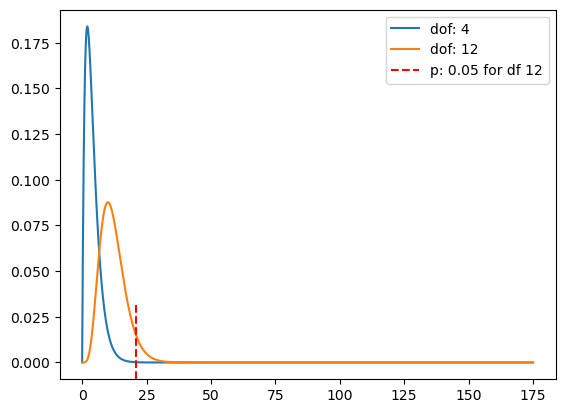

In [43]:
### Documentation ! 
## https://www.statology.org/plot-chi-square-distribution-python/
# x-axis ranges from 0 to 1750 with .001 steps
x = np.arange(0, 175, 0.001)

### plot Chi-square distribution with 4 degrees of freedom
# cf. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
plt.plot(x, stats.chi2.pdf(x, df=4), label='dof: 4')
plt.plot(x, stats.chi2.pdf(x, df=12), label='dof: 12')

plt.axvline(x=21.026, ymax=0.2, color='red', linestyle='--', label='p: 0.05 for df 12')

plt.legend()
plt.show()

### Test statistique: rejet de l'hypothèse d'indépendance ?

L'hypothèse H0 est celle de l'indépendace des variables

* valeur critique pour 12 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = __21.026__
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   *  https://www.statology.org/chi-square-distribution-table/
 
 
* chi-2 mesuré = __171.85__

* P-value: 2.0017466576875573e-30 (cf. https://www.statology.org/chi-square-p-value-calculator/)


Le chi-2 est donc largement supérieur à la valeur critique à 5 % d'erreur, donc H0 (hypothèse d'indépendance) peut être rejetée. Un lien apparaît entre région et produit vendu.

On peut ensuite mesurer la force de ce lien et ses composantes, cf. la suite

In [44]:
### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

## Le résultat montre un certain lien entre les variables, mais pas très fort
# le coééficient V de Cramer se situant entre 0 (absence d'association) et 1 (association parfaite),
# cf. Bennani, 36-37.
vc = stats.contingency.association(ddf.iloc[:-1,:-1], method='cramer')
print(vc)

0.2902373574196642


In [46]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes/chi_2
table['Total'] = table.sum(axis=1)
table.loc['Total'] = table.sum(axis=0)
table

,P1,P2,P3,P4,P5,Total
Ouest,0.002677,0.038000,0.020833,0.027118,0.006110,0.094739
Sud,0.003259,0.032763,0.045740,0.244064,0.001571,0.327398
Est,0.028922,0.240514,0.000466,0.042190,0.035265,0.347358
Nord,0.047311,0.006343,0.003142,0.145077,0.028631,0.230505
Total,0.082169,0.317621,0.070182,0.458450,0.071578,1.000000


In [47]:
### % plus lisibles
rt = round(table*100,1)
rt

## On observe que ce sont les régions Sud et Est, ainsi que le produit Nord,
#  qui apportent le plus d'écart par rapport à la situation d'indépendance

,P1,P2,P3,P4,P5,Total
Ouest,0.3,3.8,2.1,2.7,0.6,9.5
Sud,0.3,3.3,4.6,24.4,0.2,32.7
Est,2.9,24.1,0.0,4.2,3.5,34.7
Nord,4.7,0.6,0.3,14.5,2.9,23.1
Total,8.2,31.8,7.0,45.8,7.2,100.0


In [48]:
### Fonction qui détecte le signe d'une valeur
def sign(val):
    
    if val > 0:
        a = 1
    elif val < 0:
        a = -1
    else:
        a = 0    
    return a


sign(-3)

-1

In [49]:
ecarts_signe = ecarts.applymap(sign)
ecarts_signe

,P1,P2,P3,P4,P5
Ouest,-1,-1,1,1,-1
Sud,-1,-1,-1,1,1
Est,-1,1,1,-1,-1
Nord,1,-1,1,-1,1


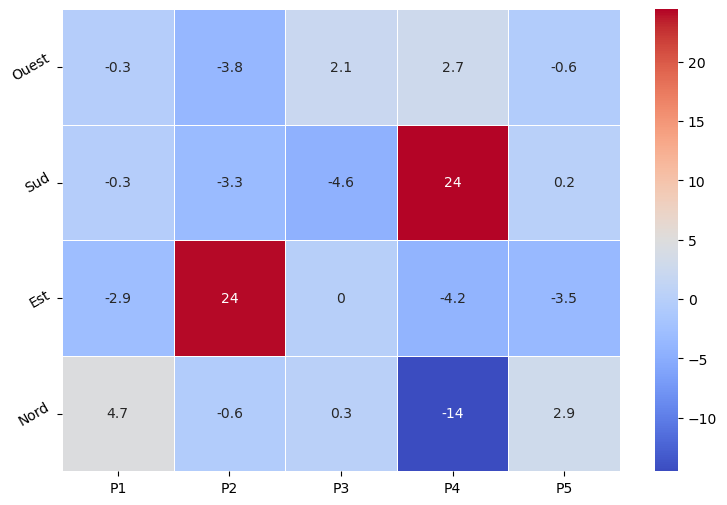

In [50]:
### Écart pondérés avec signes

tableau = rt.iloc[:-1,:-1] * ecarts_signe


fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

## Catégories socio-professionnelles et filières d'études

### Tableau de contingence

In [ ]:
d = {'ExpAgri':[80,99,65,58], 'Patron':[168,137,208,62], 'CadreSup':[470,400,876,79], 
     'Employe': [145,133,135,54], 'Ouvrier':[166,193,127,129]}
ddf = pd.DataFrame(d)
ddf = ddf.transpose()
ddf.columns= ['Droit', 'Sciences', 'Medecine','IUT']
ddf

,Droit,Sciences,Medecine,IUT
ExpAgri,80,99,65,58
Patron,168,137,208,62
CadreSup,470,400,876,79
Employe,145,133,135,54
Ouvrier,166,193,127,129


In [ ]:
## Ajouter une ligne
ddf.loc['Total']= ddf.sum()
## Ajouter une colonnne
ddf['Total'] = ddf.sum(axis=1)
ddf

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,80,99,65,58,302
Patron,168,137,208,62,575
CadreSup,470,400,876,79,1825
Employe,145,133,135,54,467
Ouvrier,166,193,127,129,615
Total,1029,962,1411,382,3784


In [ ]:
### Fréquence conjointe et fréquence marginale (proportion par rapport au total)

ddf_frq = np.round(ddf/ddf.iloc[-1,-1],4)
ddf_frq

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,0.0211,0.0262,0.0172,0.0153,0.0798
Patron,0.0444,0.0362,0.0550,0.0164,0.1520
CadreSup,0.1242,0.1057,0.2315,0.0209,0.4823
Employe,0.0383,0.0351,0.0357,0.0143,0.1234
Ouvrier,0.0439,0.0510,0.0336,0.0341,0.1625
Total,0.2719,0.2542,0.3729,0.1010,1.0000


### Pourcentages des lignes

In [ ]:
### pourcentages des lignes
stacked_data_lignes = ddf.apply(lambda x: (x/sum(x)*2).round(5), axis=1) # axis=0
stacked_data_lignes

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,0.26490,0.32781,0.21523,0.19205,1.0
Patron,0.29217,0.23826,0.36174,0.10783,1.0
CadreSup,0.25753,0.21918,0.48000,0.04329,1.0
Employe,0.31049,0.28480,0.28908,0.11563,1.0
Ouvrier,0.26992,0.31382,0.20650,0.20976,1.0
Total,0.27193,0.25423,0.37289,0.10095,1.0


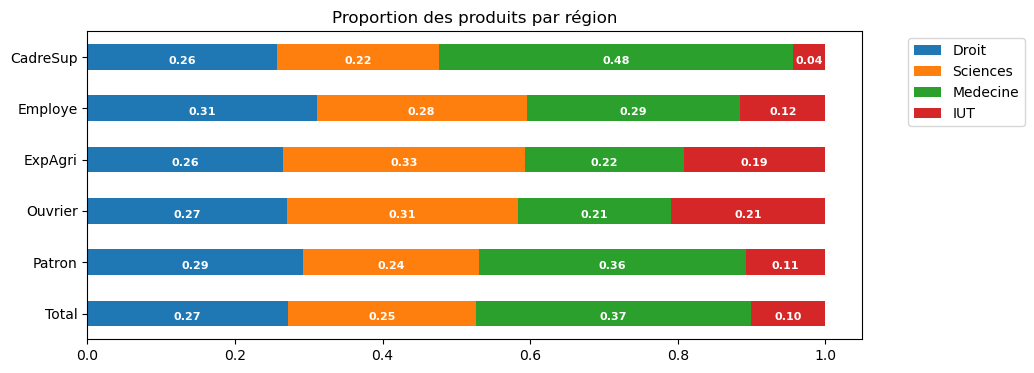

In [ ]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

ax = stacked_data_lignes.iloc[:, :-1].sort_index(ascending=False).plot(kind="barh", 
                    stacked=True, figsize=(10,4), title='Proportion des produits par région')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in ax.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    ax.annotate(format(p.get_width(), '.2f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=8,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')


ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Pourcentages des colonnes

In [ ]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

## pourcentages des colonnes (ou des lignes après avoir interverti les variables dans le tableau)
# axis=0 à la place de axis=1
stacked_data_cols = ddf.apply(lambda x: round(x*100/sum(x)*2, 2), axis=0) 
stacked_data_cols

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,7.77,10.29,4.61,15.18,7.98
Patron,16.33,14.24,14.74,16.23,15.20
CadreSup,45.68,41.58,62.08,20.68,48.23
Employe,14.09,13.83,9.57,14.14,12.34
Ouvrier,16.13,20.06,9.00,33.77,16.25
Total,100.00,100.00,100.00,100.00,100.00


In [ ]:
### Interchanger les lignes avec les colonnes (=transposer) 
#  afin d'utiliser le même affichage en diagramme à barres
ts_stacked_data_cols = stacked_data_cols.transpose()
ts_stacked_data_cols

,ExpAgri,Patron,CadreSup,Employe,Ouvrier,Total
Droit,7.77,16.33,45.68,14.09,16.13,100.0
Sciences,10.29,14.24,41.58,13.83,20.06,100.0
Medecine,4.61,14.74,62.08,9.57,9.00,100.0
IUT,15.18,16.23,20.68,14.14,33.77,100.0
Total,7.98,15.20,48.23,12.34,16.25,100.0


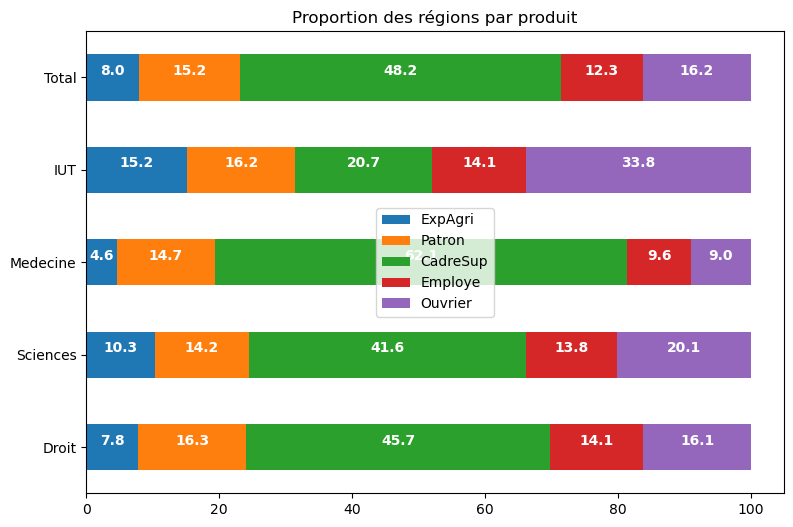

In [ ]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

z = ts_stacked_data_cols.iloc[:, :-1].plot(kind="barh", 
                        stacked=True, figsize=(9,6), title='Proportion des régions par produit')

### https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
#b = [(p.get_bbox().bounds, p.get_bbox().xmin,p.get_bbox().ymin, p.get_bbox().ymax, p.get_width(), p.get_y(), p.get_height()) for p in z.patches][59]
#print(b)
for p in z.patches:
    b = p.get_bbox()
    y_value=b.y1-b.y0
    z.annotate(format(p.get_width(), '.1f'), 
                   (p.get_x() + p.get_width()/2, p.get_y() + p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   # style = 'italic',
                   weight='bold',
                   color = 'white',
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Tableau théorique en cas d'indépendance

Produit des marges divisé par le total et arrondi

In [ ]:
tx = ddf.loc[:,["Total"]]
ty = ddf.loc[["Total"],:]
### Total général, dernière cellule de la dernière ligne
n = ddf.iat[-1,-1] 

### Compute the matrix multiplication between the columns.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html
indep = tx.dot(ty) / n
#pd.options.display.float_format = '{0:3.5}'.format

# Non arrondi
print(indep)

print('\n--------------------------\n')
# Arrondi
print(indep.round(0).astype(int))



                Droit    Sciences     Medecine         IUT   Total
ExpAgri     82.124207   76.776956   112.611522   30.487315   302.0
Patron     156.362315  146.181290   214.409355   58.047040   575.0
CadreSup   496.280391  463.966702   680.516649  184.236258  1825.0
Employe    126.993393  118.724630   174.137685   47.144292   467.0
Ouvrier    167.239693  156.350423   229.324789   62.085095   615.0
Total     1029.000000  962.000000  1411.000000  382.000000  3784.0

--------------------------

          Droit  Sciences  Medecine  IUT  Total
ExpAgri      82        77       113   30    302
Patron      156       146       214   58    575
CadreSup    496       464       681  184   1825
Employe     127       119       174   47    467
Ouvrier     167       156       229   62    615
Total      1029       962      1411  382   3784


In [ ]:
### Différence en effectifs entre le théorique et l'observé
#  Valeurs arrondies
### Doc. :
#   Bennani, p.30
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts = (ddf-indep).iloc[:-1,:-1]
## Attention : arrondi aux entiers dans l'affichage
print(ecarts.round(0).astype(int))


          Droit  Sciences  Medecine  IUT
ExpAgri      -2        22       -48   28
Patron       12        -9        -6    4
CadreSup    -26       -64       195 -105
Employe      18        14       -39    7
Ouvrier      -1        37      -102   67


In [ ]:
### Fonction qui détecte le signe d'une valeur
def sign(val):
    
    if val > 0:
        a = 1
    elif val < 0:
        a = -1
    else:
        a = 0    
    return a


sign(-3)

-1

In [ ]:
ecarts_signe = ecarts.applymap(sign)
ecarts_signe

,Droit,Sciences,Medecine,IUT
ExpAgri,-1,1,-1,1
Patron,1,-1,-1,1
CadreSup,-1,-1,1,-1
Employe,1,1,-1,1
Ouvrier,-1,1,-1,1


In [ ]:
### Ecarts positifs et pondérés par les effectifs
### Doc. :
#   Bennani, p.31
#  https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4775616-analysez-deux-variables-qualitatives-avec-le-chi-2
ecarts_ponderes = round((ddf-indep)**2/indep,2)
ecarts_ponderes.iloc[:-1,:-1]


,Droit,Sciences,Medecine,IUT
ExpAgri,0.05,6.43,20.13,24.83
Patron,0.87,0.58,0.19,0.27
CadreSup,1.39,8.82,56.15,60.11
Employe,2.55,1.72,8.80,1.00
Ouvrier,0.01,8.59,45.66,72.12


In [ ]:
ecarts_ponderes_signe = ecarts_ponderes.iloc[:-1,:-1] * ecarts_signe
ecarts_ponderes_signe

,Droit,Sciences,Medecine,IUT
ExpAgri,-0.05,6.43,-20.13,24.83
Patron,0.87,-0.58,-0.19,0.27
CadreSup,-1.39,-8.82,56.15,-60.11
Employe,2.55,1.72,-8.80,1.00
Ouvrier,-0.01,8.59,-45.66,72.12


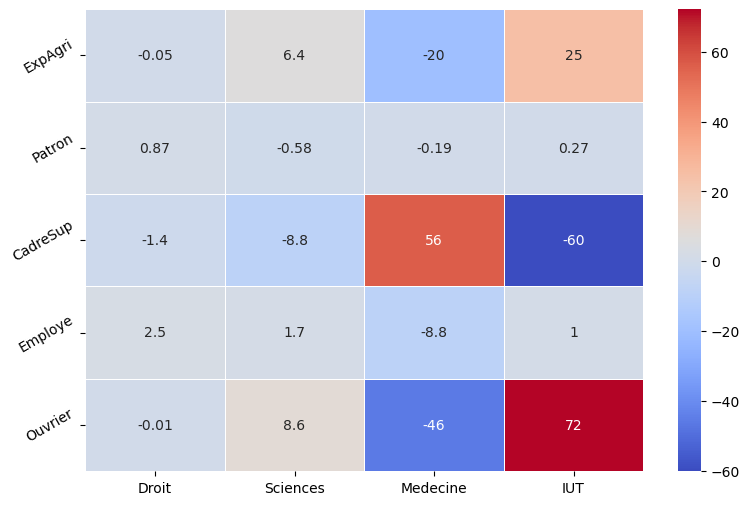

In [ ]:
### Écart pondérés
tableau = ecarts_ponderes_signe

fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

### Calcul du chi carré ou chi2

In [ ]:
### Degrés d'indépendance
print('di/dof :', (len(ecarts_ponderes_signe)-1) * (len(ecarts_ponderes_signe.columns)-1), '=', len(ecarts_ponderes_signe)-1, '*', len(ecarts_ponderes_signe.columns)-1)

di/dof : 12 = 4 * 3


In [ ]:
### La somme de tout le tableau donne le chi carré ou chi2
colonnes = ecarts_ponderes.sum()
chi_2 = ecarts_ponderes.sum().sum()
print(round(chi_2, 2))

320.27


In [ ]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(ddf.iloc[:-1,:-1])

print(statistic, p, dof)

### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),1)
dfe

320.2658717522244 2.582612649831932e-61 12


,0,1,2,3
0,82.1,76.8,112.6,30.5
1,156.4,146.2,214.4,58.0
2,496.3,464.0,680.5,184.2
3,127.0,118.7,174.1,47.1
4,167.2,156.4,229.3,62.1


In [ ]:
print("({0:.35f})".format(p))

(0.00000000000000000000000000000000000)


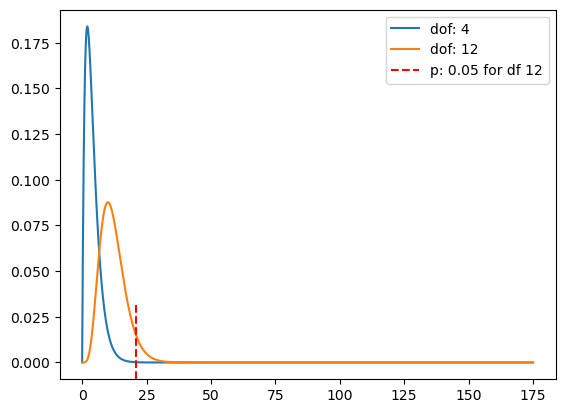

In [ ]:
### Documentation ! 
## https://www.statology.org/plot-chi-square-distribution-python/
# x-axis ranges from 0 to 1750 with .001 steps
x = np.arange(0, 175, 0.001)

### plot Chi-square distribution with 4 degrees of freedom
# cf. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
plt.plot(x, stats.chi2.pdf(x, df=4), label='dof: 4')
plt.plot(x, stats.chi2.pdf(x, df=12), label='dof: 12')

plt.axvline(x=21.026, ymax=0.2, color='red', linestyle='--', label='p: 0.05 for df 12')

plt.legend()
plt.show()

### Test statistique: rejet de l'hypothèse d'indépendance ?

L'hypothèse H0 est celle de l'indépendace des variables

* valeur critique pour 12 degrés de liberté, à 5 % (= 0.05), Bennani, p.277, tableau D2 = __21.026__
   * cf. https://fr.wikipedia.org/wiki/Loi_du_%CF%87%C2%B2
   *  https://www.statology.org/chi-square-distribution-table/
 
 
* chi-2 mesuré = __171.85__

* P-value: 2.0017466576875573e-30 (cf. https://www.statology.org/chi-square-p-value-calculator/)


Le chi-2 est donc largement supérieur à la valeur critique à 5 % d'erreur, donc H0 (hypothèse d'indépendance) peut être rejetée. Un lien apparaît entre région et produit vendu.

On peut ensuite mesurer la force de ce lien et ses composantes, cf. la suite

In [ ]:
### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

## Le résultat montre un certain lien entre les variables, mais pas très fort
# le coééficient V de Cramer se situant entre 0 (absence d'association) et 1 (association parfaite),
# cf. Bennani, 36-37.
vc = stats.contingency.association(ddf.iloc[:-1,:-1], method='cramer')
print(vc)

0.16796513356990847


In [ ]:
### Tables des proportions de contributions au chi-2
# cf. Benani, p.35

table = ecarts_ponderes/chi_2
table['Total'] = table.sum(axis=1)
table.loc['Total'] = table.sum(axis=0)
table

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,0.000156,0.020077,0.062853,0.077528,0.160614
Patron,0.002716,0.001811,0.000593,0.000843,0.005964
CadreSup,0.004340,0.027539,0.175321,0.187685,0.394886
Employe,0.007962,0.005370,0.027477,0.003122,0.043932
Ouvrier,0.000031,0.026821,0.142567,0.225185,0.394605
Total,0.015206,0.081619,0.408811,0.494364,1.000000


In [ ]:
### % plus lisibles
rt = round(table*100,1)
rt

## On observe que ce sont les régions Sud et Est, ainsi que le produit Nord,
#  qui apportent le plus d'écart par rapport à la situation d'indépendance

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,0.0,2.0,6.3,7.8,16.1
Patron,0.3,0.2,0.1,0.1,0.6
CadreSup,0.4,2.8,17.5,18.8,39.5
Employe,0.8,0.5,2.7,0.3,4.4
Ouvrier,0.0,2.7,14.3,22.5,39.5
Total,1.5,8.2,40.9,49.4,100.0


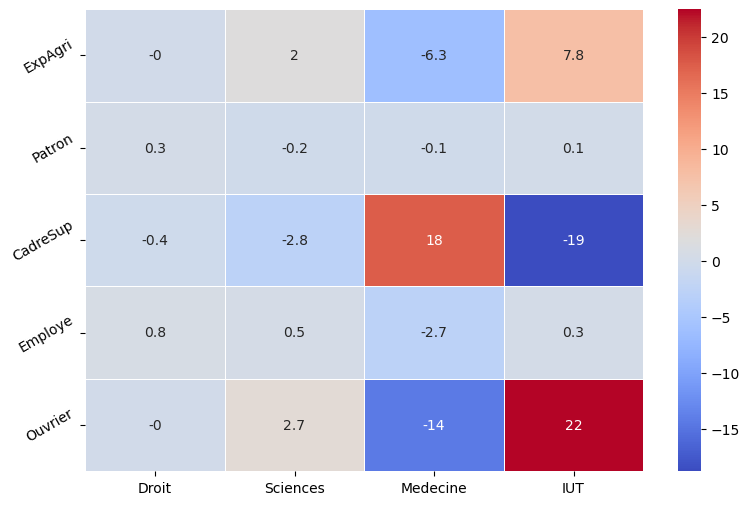

In [ ]:
### Écart pondérés avec signes

tableau = rt.iloc[:-1,:-1] * ecarts_signe


fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()